In [19]:
# Импортируем нужные библиотеки
import numpy as np
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split # класс разбиения на данные для обучения и для проверки
# импортируем функции
from functions import generate_random_array, plot_true_vs_predicted

In [20]:
# Исходные функции
# первая функция
def ackley(x, y, z):
    term1 = -20 * np.exp(-0.2 * np.sqrt((x**2 + y**2 + z**2) / 3))
    term2 = -np.exp((np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y) + np.cos(2 * np.pi * z)) / 3)
    function = term1 + term2 + 20 + np.e
    return function

# вторая функция
def exponential (x, y, z):
    function = np.exp(0.1*x) + np.exp(0.1*y) + np.exp(0.1*z) 
    return function


# третья функция
def gaussian (x, y):
    function = np.exp(-(x**2 + y**2)/2)
    return function


# четвертая функция
def hypersphere_4d (x1, x2, x3, x4):
    function = x1**2 + x2**2 + x3**2 + x4**2
    return function

# пятая функция
def hypersphere_5d (x1, x2, x3, x4, x5):
    function = x1**2 + x2**2 + x3**2 + x4**2 + x5**2
    return function

# шестая функция
def linear_5d (x1, x2, x3, x4, x5):
    function = x1 + 2*x2 + 3*x3 + 4*x4 + 5*x5 + 1
    return function

# восьмая функция
def polynomial(x, y, z):
    function = 1 + 0.5 * (x**2 + y**2 + z**2) + 0.1 * (x**3 + y**3 + z**3)
    return function

# девятая функция
def product (x, y, z):
    function = x*y*z
    return function
    

# десятая функция
def trigonometric (x, y, z):
    function = np.sin(x)*np.cos(2*x) + np.sin(y)*np.cos(2*y) + np.sin(z)*np.cos(2*z)
    return function



In [21]:
# Исходные данные

# вид функции
main_function = exponential

# назначаем количество строк в генерируемом датасете 
n_samples = 100

# пределы варьирования признаков
limits = (-10, 10)


# определяем колиство признаков
match main_function:

    case _ if main_function is ackley:
        n_features = 3
        function_name = 'ackley'

    case _ if main_function is exponential:
        n_features = 3
        function_name = 'exponential'

    case _ if main_function is gaussian:
        n_features = 2
        function_name = 'gaussian'    
    
    case _ if main_function is hypersphere_4d:
        n_features = 4
        function_name = 'hypersphere_4d'
    
    case _ if main_function is hypersphere_5d:
        n_features = 5
        function_name = 'hypersphere_5d'
        
    case _ if main_function is linear_5d:
        n_features = 5
        function_name = 'linear_5d'
    
    case _ if main_function is polynomial:
        n_features = 3
        function_name = 'polynomial'

    case _ if main_function is product:
        n_features = 3
        function_name = 'product'

    case _ if main_function is trigonometric:
        n_features = 3
        function_name = 'trigonometric'

    

        
        

In [22]:
# генерим случайный массив признаков от -10 до +10
features = generate_random_array(n_samples, n_features, limits[0], limits[1], seed = 42)
# Подставляем сгенерированный массив в функцию
target = main_function (*features.T)

In [23]:
# разбиваем данные на данные для обучения и для проверки
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.1,random_state=42)

In [24]:
# Создаём модель
model = XGBRegressor(
                    n_estimators=1000,
                    max_depth=4,
                    learning_rate=0.1,
                    reg_alpha=0.5,
                    reg_lambda=0.5,
                    subsample=0.8,
                    random_state=42,
                    verbosity=0
                    )
model.fit(X_train, y_train);

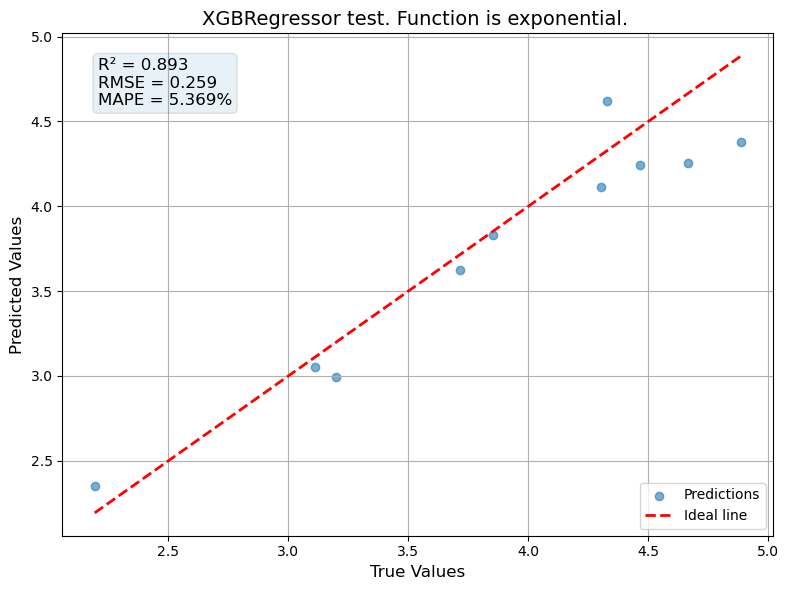

In [25]:
# Расчитываем отклик по данным для проверки
y_pred = model.predict(X_test)
# посмотрим на результат
plot_true_vs_predicted (y_test, y_pred, title= f'XGBRegressor test. Function is {function_name}. ')

In [26]:
# генерим еще случайные данные, в этот раз много для более глубокой проверки модели
# генерим случайный массив признаков от -10 до +10
features = generate_random_array(1000, n_features, limits[0], limits[1], seed = 1488)
# Подставляем сгенерированный массив в функцию
target = main_function(*features.T)

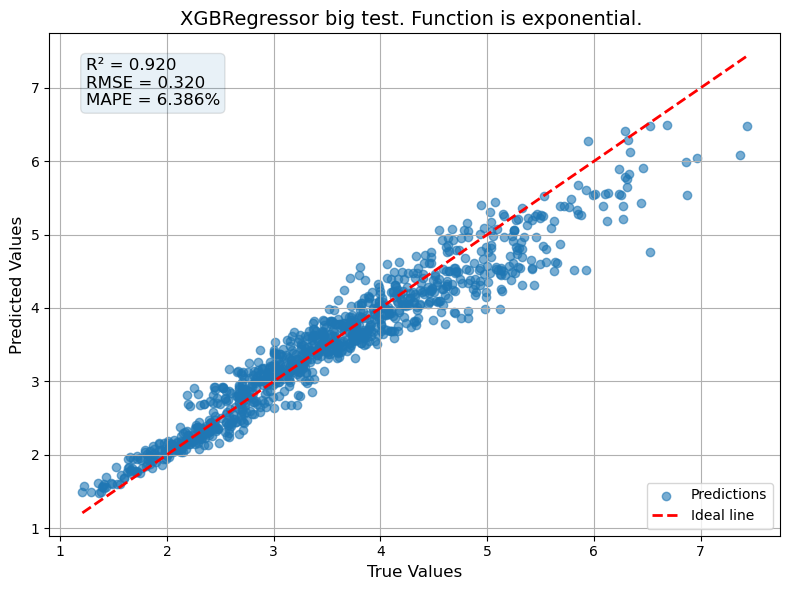

In [27]:
# Расчитываем отклик по данным для проверки
y_pred_big_test = model.predict(features)
# посмотрим на результат
plot_true_vs_predicted (target, y_pred_big_test, title= f'XGBRegressor big test. Function is {function_name}. ')